Identificação de Fatores de Influência:

Quais variáveis têm o maior impacto nas vendas? É a idade dos clientes, o número de itens adquiridos ou outra variável que mais influencia o total gasto?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

-> Carregamento dos dados

In [2]:
dados = pd.read_csv('dados_vendas.csv')
dados.head(7)

,ClientAge,WebVisits,BrowsingTime,ItemsPurchased,TotalSpent,StoreRating,DeliveryTime
0,56,52,201,7,755,1,7
1,69,66,162,11,962,2,8
2,46,43,223,8,637,1,9
3,32,30,239,7,476,4,4
4,60,58,191,9,847,3,7
5,25,29,234,4,393,4,7
6,78,77,148,16,1124,2,7


-> Matriz de correlação para ver quais atributos são mais significantes

In [3]:
dados.corr()

,ClientAge,WebVisits,BrowsingTime,ItemsPurchased,TotalSpent,StoreRating,DeliveryTime
ClientAge,1.000000,0.987575,-0.974043,0.895673,0.981559,-0.002477,0.045512
WebVisits,0.987575,1.000000,-0.987505,0.904939,0.994535,-0.008303,0.043509
BrowsingTime,-0.974043,-0.987505,1.000000,-0.893574,-0.982392,0.004818,-0.036999
ItemsPurchased,0.895673,0.904939,-0.893574,1.000000,0.900208,-0.004329,0.024168
TotalSpent,0.981559,0.994535,-0.982392,0.900208,1.000000,-0.006843,0.042552
StoreRating,-0.002477,-0.008303,0.004818,-0.004329,-0.006843,1.000000,-0.707527
DeliveryTime,0.045512,0.043509,-0.036999,0.024168,0.042552,-0.707527,1.000000


Tirando os atributos StoreRating e DeliveryTime, os outros são bastante significativos para o total de gasto

-> Gráfico de Dispersão para os atributos mais signifantes, para mostrar como cada atributo se relaciona com os outros em relação ao 'TotalSpent'.

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


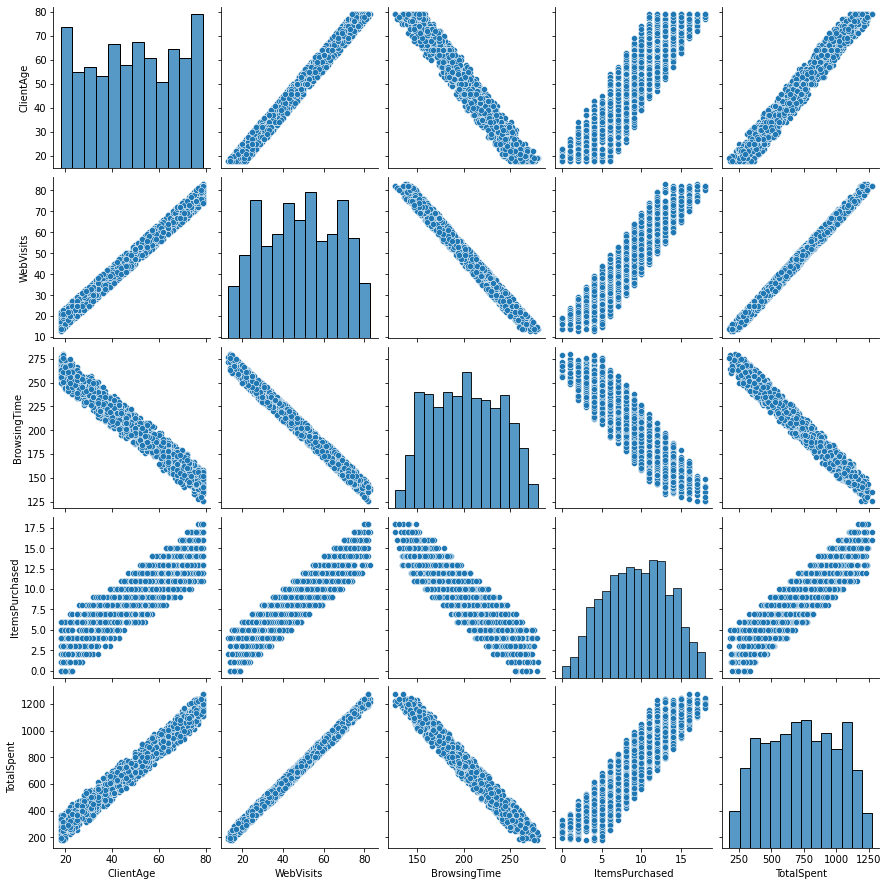

In [5]:
atributos_significativos = ['ClientAge', 'WebVisits', 'BrowsingTime', 'ItemsPurchased', 'TotalSpent']

sns.pairplot(dados[atributos_significativos])
plt.show()

-> Dividir os dados em preditoras (X) e alvo (y)

In [6]:
X = dados[['ClientAge', 'WebVisits', 'BrowsingTime', 'ItemsPurchased']]
y = dados['TotalSpent']

-> Dividir os dados em conjuntos de treinamento e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

REGRESSÃO LINEAR

-> Criação e inicialização do modelo

In [8]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

-> Previsões com o conjunto de teste

In [9]:
reg_prev = reg_model.predict(X_test)

-> Avaliação

In [10]:
mse = mean_squared_error(y_test, reg_prev)
r2 = r2_score(y_test, reg_prev)

print(f'Erro Quadrático Médio: {mse:.2f}')
print(f'R²: {r2:.2f}')

Erro Quadrático Médio: 806.07
R²: 0.99


REGRESSÃO RIDGE

-> Criação e trinamento do modelo

In [11]:
rigde_model = Ridge(alpha=1.0)
rigde_model.fit(X_train, y_train)

Ridge()

-> Previsões com conjunto de teste

In [12]:
ridge_prev = rigde_model.predict(X_test)

-> Avaliação

In [13]:
mse = mean_squared_error(y_test, ridge_prev)
r2 = r2_score(y_test, ridge_prev)

print(f'Erro Quadrático Médio: {mse:.2f}')
print(f'R²: {r2:.2f}')

Erro Quadrático Médio: 806.05
R²: 0.99


São ótimos resultados para ambos os modelos de Regressão Linear e Regressão de Ridge! 

Um Erro Quadrático Médio (MSE) de aproximadamente 806 e um coeficiente de determinação (R²) de 0.99 indicam que os modelos estão fazendo previsões muito precisas.

-> Visualização dos resultados com Seaborn

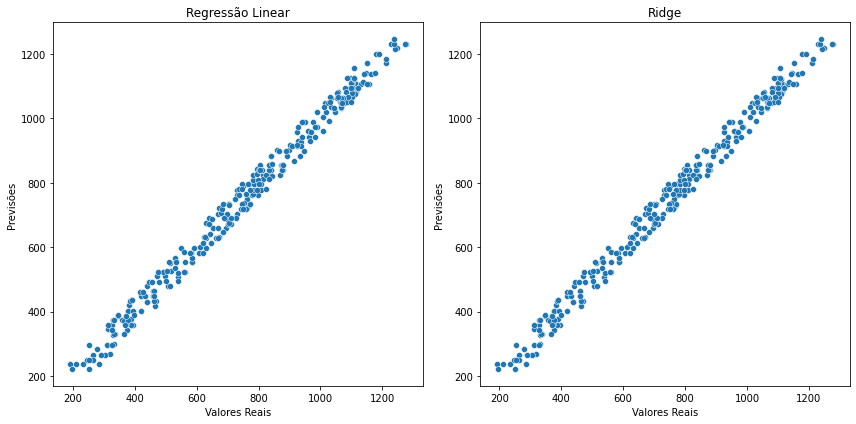

In [17]:
# Visualizar as previsões vs valores reais para Regressão Linear
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=reg_prev)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão Linear')

# Visualizar as previsões vs valores reais para Regressão de Ridge
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=ridge_prev)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Ridge')

plt.tight_layout()
plt.show()

Vamos analisar os coeficientes dos modelos para determinar quais variáveis têm o maior impacto nas vendas

In [18]:
# Coeficiente da Regressão Linear
coef_linear = reg_model.coef_

# Mapeando coeficientes para nomes de variáveis
nomes_variaveis = ['ClientAge', 'WebVisits', 'BrowsingTime', 'ItemsPurchased']

# Criando um dicionário com nomes de variáveis e seus coeficientes
coef_linear_dict = dict(zip(nomes_variaveis, coef_linear))

# Mostrando os coeficientes
print('Coeficientes da Regressão Linear')
print(coef_linear_dict)

Coeficientes da Regressão Linear
{'ClientAge': -0.5065128336820146, 'WebVisits': 15.407955283746151, 'BrowsingTime': -0.05432811256410375, 'ItemsPurchased': 0.09805654548527243}


In [19]:
# Coeficientes da Regressão de Ridge
coeficientes_ridge = rigde_model.coef_

# Criando um dicionário com nomes de variáveis e seus coeficientes
coeficientes_ridge_dict = dict(zip(nomes_variaveis, coeficientes_ridge))

# Mostrando os coeficientes
print("Coeficientes da Regressão de Ridge:")
print(coeficientes_ridge_dict)

Coeficientes da Regressão de Ridge:
{'ClientAge': -0.5048608684884041, 'WebVisits': 15.40462168638838, 'BrowsingTime': -0.05509946811487109, 'ItemsPurchased': 0.09875532008935094}


CONCLUSÃO

WebVisits: Possui o maior coeficiente positivo (15.41), indicando que um aumento no número de visitas ao site está fortemente associado a um aumento nas vendas. Quanto mais visitas ao site, maior é o total gasto pelos clientes.

ItemsPurchased: Também tem um coeficiente positivo (0.0981), o que significa que um aumento no número de itens comprados está associado a um aumento nas vendas. No entanto, esse coeficiente é menor em comparação com o número de visitas.

ClientAge: Possui um coeficiente negativo (-0.5065), o que indica que, de certa forma, a idade dos clientes está associada a uma diminuição nas vendas. No entanto, o valor absoluto desse coeficiente é menor em comparação com o número de visitas, indicando uma influência menor nas vendas.

BrowsingTime: Possui um coeficiente negativo (-0.0543), indicando que o tempo de navegação está associado a uma diminuição nas vendas. No entanto, esse coeficiente é relativamente pequeno, indicando uma influência menor em comparação com o número de visitas.

Com base nos coeficientes, WebVisits é a variável que tem o maior impacto nas vendas, seguida por ItemsPurchased. ClientAge e BrowsingTime têm um impacto menor nas vendas em comparação com as outras variáveis.